In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
data = pd.read_json('data.ndjson', lines=True)

In [2]:
data['n_turns_context'] = data['source'].apply(lambda x: x.count('[EOT]') + 1)
data['n_words_completion'] = data['human_completions'].apply(lambda x: len(re.sub(r'[^A-Za-z0-9 ]+', 
                                                                                  '', 
                                                                                  x[0]).replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').split()))

### Length of context and word length for responses

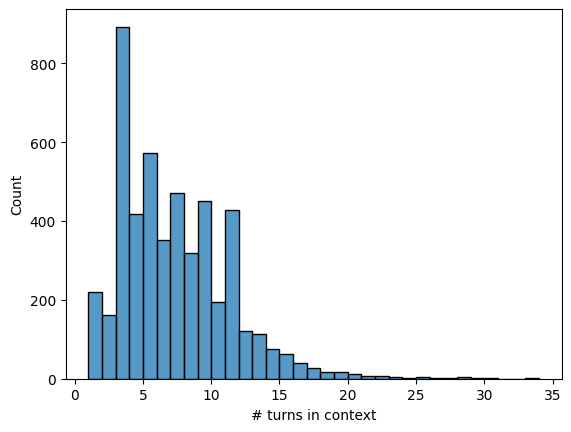

In [3]:
sns.histplot(data['n_turns_context'], binwidth=1)
plt.xlabel('# turns in context')
plt.show()

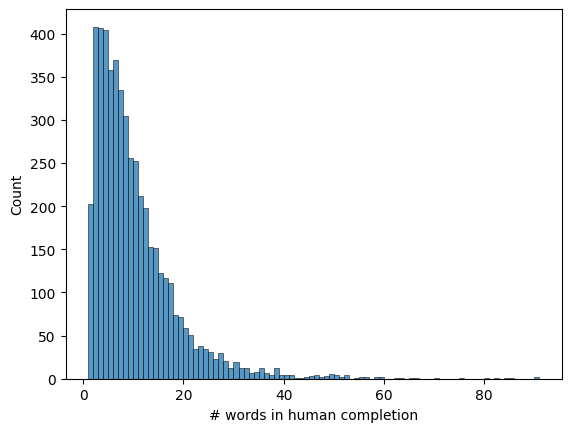

In [4]:
sns.histplot(data['n_words_completion'], binwidth=1)
plt.xlabel('# words in human completion')
plt.show()

### Distribution of additional labels (e.g., emotions and speech acts)

In [5]:
for k in data['annotations'].iloc[0].keys():
    data[k] = data['annotations'].apply(lambda x: x[k])

In [8]:
from mappings import emo_dict, act_dict
data['comp-emo-mapped'] = data['comp-emo'].apply(lambda x: emo_dict[x])
data['last-source-emo-mapped'] = data['source-emo'].apply(lambda x: emo_dict[x[-1]])
data['comp-act-mapped'] = data['comp-act'].apply(lambda x: act_dict[x])
data['last-source-act-mapped'] = data['source-act'].apply(lambda x: act_dict[x[-1]])

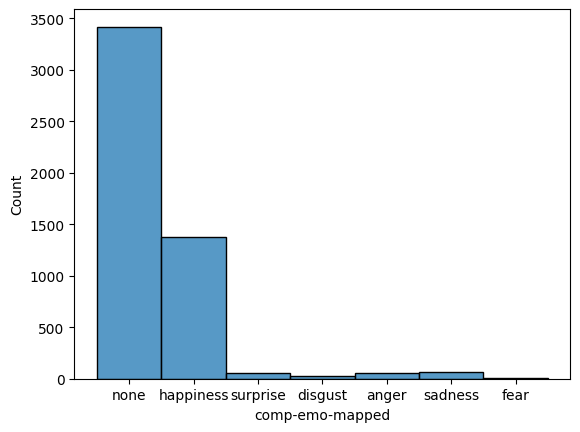

In [10]:
sns.histplot(data, x='comp-emo-mapped')
plt.show()

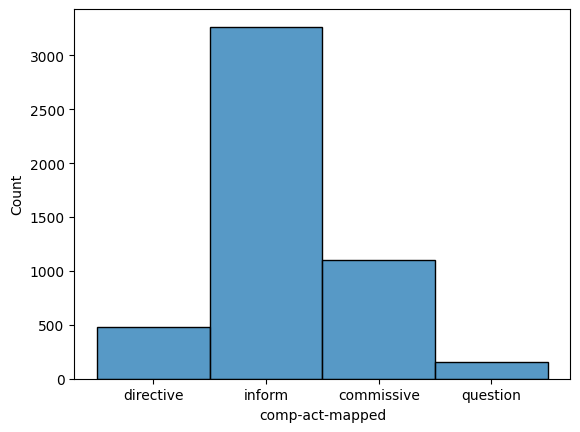

In [11]:
sns.histplot(data, x='comp-act-mapped')
plt.show()

In [23]:
def _get_heatmap(cols):
    grouped = data.groupby(cols).count().id.reset_index()
    return grouped.pivot(columns=cols[0], index=cols[1], values='id')


In [40]:
emo_wide = _get_heatmap(['comp-emo-mapped', 'last-source-emo-mapped']).fillna(0)
act_wide = _get_heatmap(['comp-act-mapped', 'last-source-act-mapped']).fillna(0)
emo_wide_prop = (emo_wide.T  / emo_wide.sum(axis=1).values).T
act_wide_prop = (act_wide.T  / act_wide.sum(axis=1).values).T

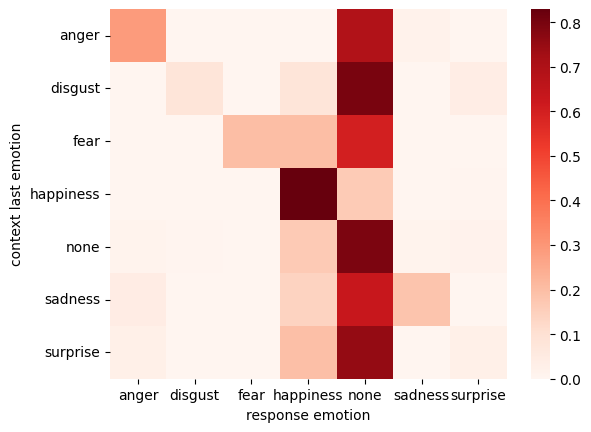

In [69]:
sns.heatmap(emo_wide_prop, cmap='Reds')
plt.ylabel('context last emotion')
plt.xlabel('response emotion')
plt.show()

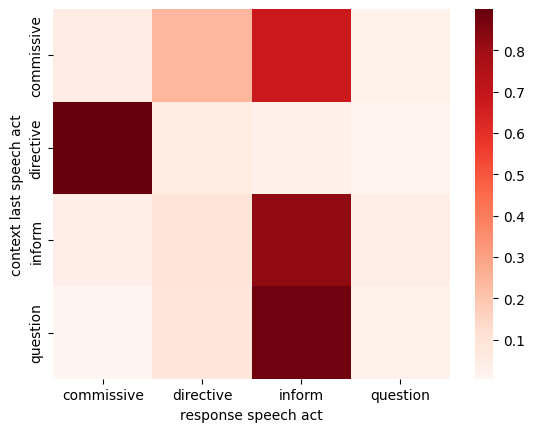

In [70]:
sns.heatmap(act_wide_prop, cmap='Reds')
plt.ylabel('context last speech act')
plt.xlabel('response speech act')
plt.show()

### Look at text descriptives

In [7]:
data = pd.read_csv('../../out/dailydialog_completions.csv', index_col=0)